# 1. 단순 선형 회귀분석 (Simple Linear Regression)
* 종속변수에 영향을 미치는 독립변수가 1개
* 키에 대한 몸무게 예측
* 학습시간에 따른 성적 예측

## 1-1. 키에 대한 몸무게 예측

### 1) 문제정의
키에 대한 몸무게 예측하기

### 2) 데이터 수집
* https://www.kaggle.com/tmcketterick/heights-and-weights

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

ori_data = pd.read_csv('data/01_height_weight/data.csv')
data = ori_data.copy()
data

,Height,Weight
0,1.47,52.21
1,1.50,53.12
2,1.52,54.48
3,1.55,55.84
4,1.57,57.20
5,1.60,58.57
6,1.63,59.93
7,1.65,61.29
8,1.68,63.11
9,1.70,64.47


### 3) 데이터 전처리
* 결측치 처리

In [19]:
data.shape

(15, 2)

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Height  15 non-null     float64
 1   Weight  15 non-null     float64
dtypes: float64(2)
memory usage: 368.0 bytes


In [21]:
data.isnull().sum()

Height    0
Weight    0
dtype: int64

### 4) 데이터 탐색
* 상관관계
* 산점도(Scatter Plot)

In [22]:
data.corr()

,Height,Weight
Height,1.000000,0.994584
Weight,0.994584,1.000000


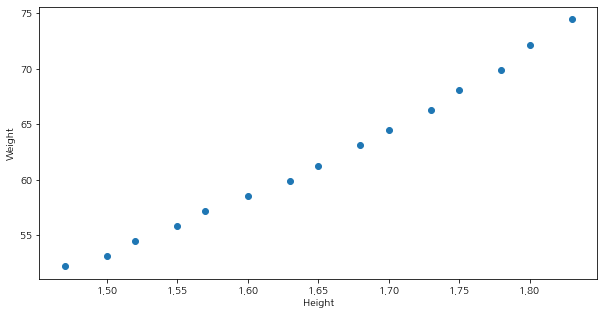

In [71]:
plt.figure(figsize=(10, 5))
plt.xlabel('Height')
plt.ylabel('Weight')
plt.scatter(data.Height, data.Weight)
plt.show()

### 5) 모델 학습
* 데이터 쪼개기
* 선형회귀 학습
* 선형회귀 예측

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [43]:
# 입력데이터(독립변수) : Height (2차원)
# 타겟데이터(종속변수) : Weight (1차원)
input_data = data[['Height']].to_numpy()
target_data = data['Weight'].to_numpy()
input_data, target_data

(array([[1.47],
        [1.5 ],
        [1.52],
        [1.55],
        [1.57],
        [1.6 ],
        [1.63],
        [1.65],
        [1.68],
        [1.7 ],
        [1.73],
        [1.75],
        [1.78],
        [1.8 ],
        [1.83]]),
 array([52.21, 53.12, 54.48, 55.84, 57.2 , 58.57, 59.93, 61.29, 63.11,
        64.47, 66.28, 68.1 , 69.92, 72.19, 74.46]))

In [79]:
X_train, X_test, y_train, y_test = train_test_split(input_data, target_data, test_size=0.25, random_state=0)
X_train, X_test, y_train, y_test

(array([[1.83],
        [1.57],
        [1.52],
        [1.8 ],
        [1.73],
        [1.65],
        [1.75],
        [1.55],
        [1.47],
        [1.6 ],
        [1.78]]),
 array([[1.5 ],
        [1.63],
        [1.68],
        [1.7 ]]),
 array([74.46, 57.2 , 54.48, 72.19, 66.28, 61.29, 68.1 , 55.84, 52.21,
        58.57, 69.92]),
 array([53.12, 59.93, 63.11, 64.47]))

In [80]:
# LinearRegression : 선형회귀 알고리즘을 구현한 클래스
# fit() : 학습, score() : 평가, predict() : 예측
lr = LinearRegression()

In [81]:
# 선형 회귀 모델 학습
lr.fit(X_train, y_train)

LinearRegression()

In [82]:
lr.coef_, lr.intercept_

(array([61.65610384]), -39.51671772684755)

In [83]:
# 선형 회귀 모델 예측
lr.predict([[1.78]])

array([70.2311471])

In [84]:
# Weight = a * Height + b
61.65610384 * 1.78 -39.51671772684755

70.23114710835245

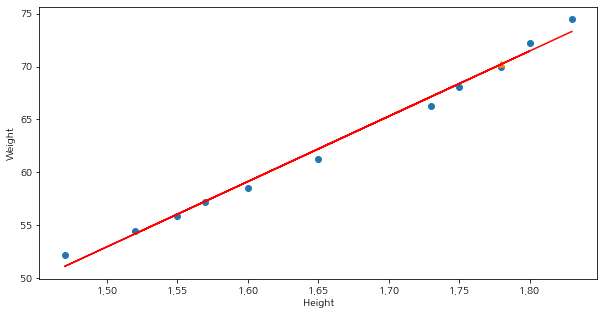

In [85]:
plt.figure(figsize=(10, 5))
plt.xlabel('Height')
plt.ylabel('Weight')
plt.scatter(X_train, y_train)
plt.plot(X_train, lr.predict(X_train), color='r')
plt.scatter(1.78, 70.2311471, marker='^')
plt.show()

In [86]:
### 6) 모델 평가
y_pred = lr.predict(X_test)
pd.DataFrame({'Height': X_test[:,0], 'Actual Weight': y_test, 'Predicted Weight': y_pred})

,Height,Actual Weight,Predicted Weight
0,1.50,53.12,52.967438
1,1.63,59.93,60.982732
2,1.68,63.11,64.065537
3,1.70,64.47,65.298659


In [88]:
lr.score(X_train, y_train)  # 훈련세트

0.9911687298435302

In [89]:
lr.score(X_test, y_test)  # 테스트 세트

0.9644799660895075

In [90]:
from sklearn import metrics
metrics.r2_score(y_test, y_pred)

0.9644799660895075

In [91]:
y_pred2 = lr.predict(X_train)
metrics.r2_score(y_train, y_pred2)

0.9911687298435302

In [92]:
# R-Sqaured(결정계수), Adj R-Squared(수정된 결정계수)

### 7) 결과 해석 및 문제해결방안 도출
* R-Squared(결정계수)가 1에 가까우므로 학습이 잘 되었다고 할 수 있음
* 훈련세트는 높은데 테스트세트가 낮은 것으로 보아 과대적합되었다고 할 수 있음